<a href="https://colab.research.google.com/github/Mayurd9/KIDNEY-MATCHING-PROBLEM/blob/main/Kidney_matching_problem_using_integer_programming_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


$\textbf{Project Title: Implementation of integer programming models for kidney exchange problem}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# **Problem Description:**

In [ ]:
weight= np.array([[0,1,11,6,3,18,0,5,1,4],
                  [4,0,9,5,15,9,8,0,9,1 ],
                  [0,19,0,8,5,14,4,8,4,3],
                  [1,13,17,0,0,8,0,1,0,7],
                  [22,3,4,16,0,2,1,6,2,0],
                  [19,3,0,6,23,0,7,3,1,8],
                  [0,4,7,0,2,7,0,7,20,0 ],
                  [8,5,2,3,9,0,6,0,8,18 ],
                  [1,4,8,0,5,3,2,15,0,4 ],
                  [4,0,1,6,9,6,18,4,6,0 ]])

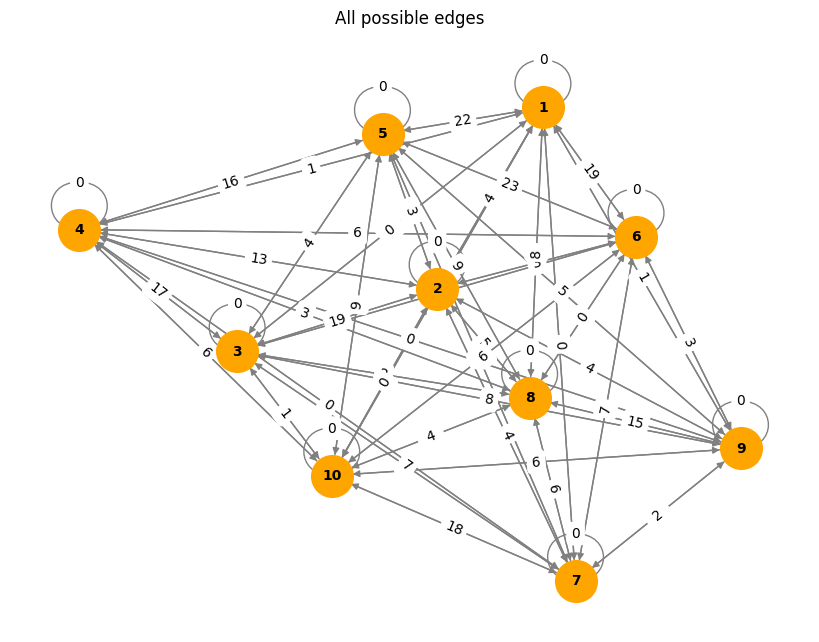

In [ ]:
G = nx.DiGraph()

weight= np.array([[0,1,11,6,3,18,0,5,1,4],
                  [4,0,9,5,15,9,8,0,9,1 ],
                  [0,19,0,8,5,14,4,8,4,3],
                  [1,13,17,0,0,8,0,1,0,7],
                  [22,3,4,16,0,2,1,6,2,0],
                  [19,3,0,6,23,0,7,3,1,8],
                  [0,4,7,0,2,7,0,7,20,0 ],
                  [8,5,2,3,9,0,6,0,8,18 ],
                  [1,4,8,0,5,3,2,15,0,4 ],
                  [4,0,1,6,9,6,18,4,6,0 ]])

X=np.ones((10,10))

# Define node names
node_names = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6',6:'7',7:'8',8:'9',9:'10'}

# Add edges to the graph based on the decision variables matrix
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i, j] == 1:
            G.add_edge(node_names[i], node_names[j], weight=weight[i, j])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_size=900, node_color='orange', font_size=10, font_weight='bold', edge_color='gray')
edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
plt.title('All possible edges')
plt.show()


# **Solution using different approaches:**

# **1) Edge formulation**

In [ ]:
!pip -q install pyomo
from pyomo.environ import *
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [ ]:
model = ConcreteModel()

# since variable are two dimensional ie., x_{ij}, therefore both row and column indicies are defined below
n = 10
row_indices = np.arange(n)
col_indices = np.arange(n)

# defining varibles used in model x_{ij}
model.x = Var(row_indices, col_indices, domain = Binary)

# Set objective function coefficients
weight= np.array([[0,1,11,6,3,18,0,5,1,4],
                  [4,0,9,5,15,9,8,0,9,1 ],
                  [0,19,0,8,5,14,4,8,4,3],
                  [1,13,17,0,0,8,0,1,0,7],
                  [22,3,4,16,0,2,1,6,2,0],
                  [19,3,0,6,23,0,7,3,1,8],
                  [0,4,7,0,2,7,0,7,20,0 ],
                  [8,5,2,3,9,0,6,0,8,18 ],
                  [1,4,8,0,5,3,2,15,0,4 ],
                  [4,0,1,6,9,6,18,4,6,0 ]])

# Define the objective function
model.Objective = Objective(expr = sum(weight[i,j]*model.x[i,j] for i in row_indices for j in col_indices), sense = maximize)

# Define the constraints
model.constraints = ConstraintList()

#Adding constraints
for i in row_indices:
  model.constraints.add(sum(model.x[j,i] for j in col_indices) == sum(model.x[i,j] for j in col_indices))
  model.constraints.add(sum(model.x[i,j] for j in col_indices)<=1)

#Making subsets
import itertools
subsets=[]
subset_length=5
for subset in itertools.permutations(range(10), subset_length):
  subsets.append(list(subset))

for s in subsets:
  model.constraints.add(sum(model.x[s[i],s[i+1]] for i in range(4))<=3)

# Solve the problem using GLPK solver
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

print(results)


Problem: 
- Name: unknown
  Lower bound: 175.0
  Upper bound: 175.0
  Number of objectives: 1
  Number of constraints: 30260
  Number of variables: 100
  Number of nonzeros: 121240
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.6754093170166016
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#Displaying the solution

print('Maximum objective value (Maximum weight) = ', value(model.Objective))
print('\nDecision Variables matrix:')
X=np.zeros((10,10))
for i in row_indices:
  for j in col_indices:
    X[i,j]=model.x[i,j].value

print()
print('Solution matrix:')
print('X=',X)

Maximum objective value (Maximum weight) =  175.0

Decision Variables matrix:

Solution matrix:
X= [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


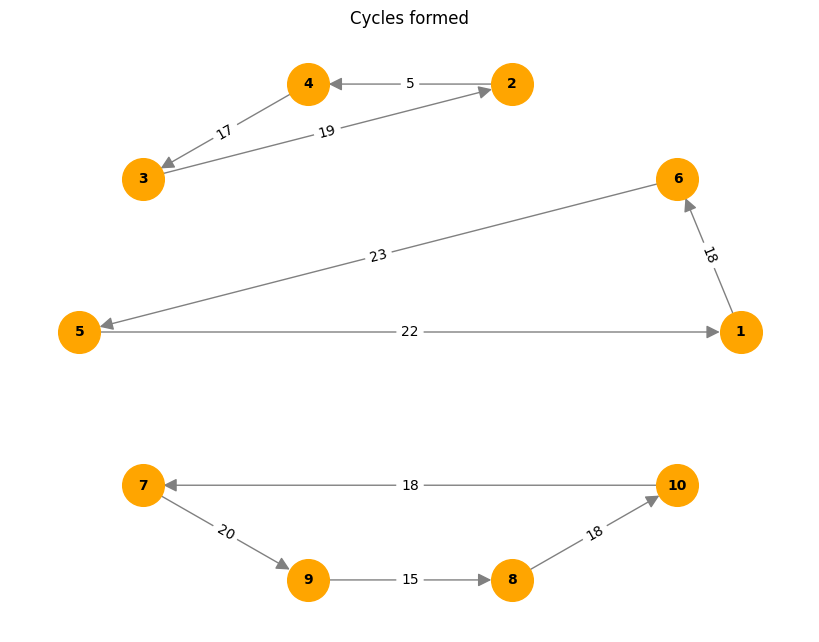

In [ ]:
#Displaying the solution using graph

G = nx.DiGraph()

# Define node names
node_names = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6',6:'7',7:'8',8:'9',9:'10'}

# Add edges to the graph based on the decision variables matrix
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i, j] == 1:
            G.add_edge(node_names[i], node_names[j], weight=weight[i, j])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_size=900, node_color='orange', font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
plt.title('Cycles formed')
plt.show()


# **2) Cycle formulation**

In [ ]:
model = ConcreteModel()

import itertools
all_cycles=[]
for subset_length in range(3,5):
  for subset in itertools.permutations(range(10), subset_length):
    all_cycles.append(list(subset))

weight= np.array([[0,1,11,6,3,18,0,5,1,4],
                  [4,0,9,5,15,9,8,0,9,1 ],
                  [0,19,0,8,5,14,4,8,4,3],
                  [1,13,17,0,0,8,0,1,0,7],
                  [22,3,4,16,0,2,1,6,2,0],
                  [19,3,0,6,23,0,7,3,1,8],
                  [0,4,7,0,2,7,0,7,20,0 ],
                  [8,5,2,3,9,0,6,0,8,18 ],
                  [1,4,8,0,5,3,2,15,0,4 ],
                  [4,0,1,6,9,6,18,4,6,0 ]])

cycle_weight=[]
for C in all_cycles:
  w=weight[C[-1],C[0]]
  for i in range(len(C)-1):
    w+=weight[C[i],C[i+1]]
  cycle_weight.append(w)

# defining varibles
model.x = Var(np.arange(len(all_cycles)), domain = Binary)

# Define the objective function
model.Objective = Objective(expr = sum(cycle_weight[i]*model.x[i] for i in range(len(all_cycles))), sense = maximize)

# Define the constraints
model.constraints = ConstraintList()

#Adding constraints
for i in range(10):
  term=0
  for C in all_cycles:
    if i in C:
      term+=model.x[all_cycles.index(C)]

  model.constraints.add(term <=1)

# Solve the problem using GLPK solver
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

print(results)


Problem: 
- Name: unknown
  Lower bound: 175.0
  Upper bound: 175.0
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 5760
  Number of nonzeros: 22320
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.061835527420043945
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#Displaying the solution

print('Maximum objective value (Maximum weight) = ', value(model.Objective))
print('\nDecision Variables matrix:')
chosen_cycles=[]
for i in range(len(all_cycles)):
    # print('C',i,'=', model.x[i].value)
    if model.x[i].value==1:
      chosen_cycles.append(i)

X=np.zeros((10,10))
for k in chosen_cycles:
  for i in range(len(all_cycles[k])-1):
    X[all_cycles[k][i],all_cycles[k][i+1]]=1
  X[all_cycles[k][-1],all_cycles[k][0]]=1

print()
print('Solution matrix:')
print('X=',X)

Maximum objective value (Maximum weight) =  175.0

Decision Variables matrix:

Solution matrix:
X= [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


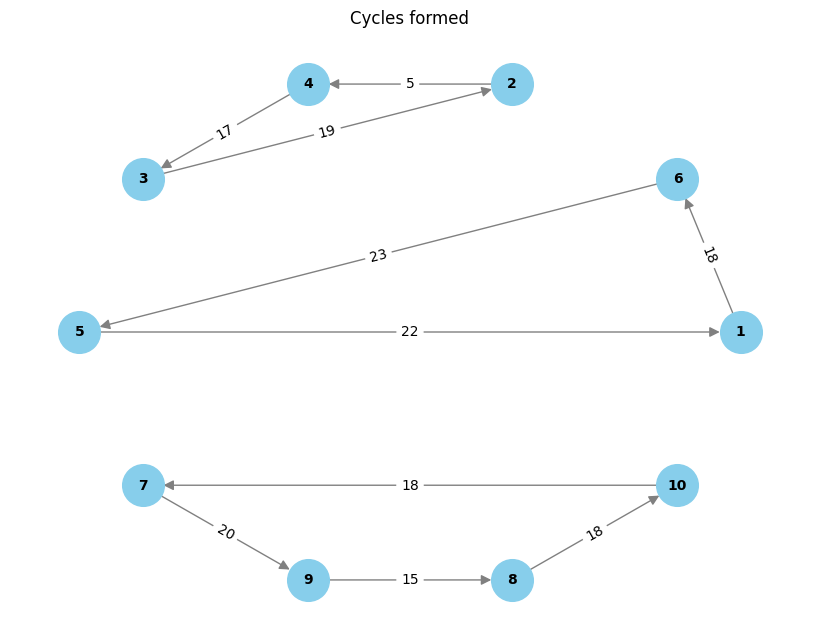

In [ ]:
#Displaying the solution using graph

G = nx.DiGraph()

# Define node names
node_names = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6',6:'7',7:'8',8:'9',9:'10'}

# Add edges to the graph based on the decision variables matrix
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i, j] == 1:
            G.add_edge(node_names[i], node_names[j], weight=weight[i, j])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_size=900, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', arrowsize=15)
edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
plt.title('Cycles formed')
plt.show()

# **3) Reduced Edge Assignment Formulation**

In [ ]:
model = ConcreteModel()

# since variable are two dimensional ie., x_{ij}, therefore both row and column indicies are defined below
n = 10
row_indices = np.arange(n)
col_indices = np.arange(n)
L= np.arange(n)                            #length of V
k=4                            #maximum allowable cycle length

# defining varibles used in model
model.x = Var(row_indices, col_indices, domain = Binary)       #6(h)
model.y = Var(row_indices, L , domain = Binary)                #6(i)

weight= np.array([[0,1,11,6,3,18,0,5,1,4],
                  [4,0,9,5,15,9,8,0,9,1 ],
                  [0,19,0,8,5,14,4,8,4,3],
                  [1,13,17,0,0,8,0,1,0,7],
                  [22,3,4,16,0,2,1,6,2,0],
                  [19,3,0,6,23,0,7,3,1,8],
                  [0,4,7,0,2,7,0,7,20,0 ],
                  [8,5,2,3,9,0,6,0,8,18 ],
                  [1,4,8,0,5,3,2,15,0,4 ],
                  [4,0,1,6,9,6,18,4,6,0 ]])

# Define the objective function   6(a)
model.Objective = Objective(expr = sum(weight[i,j]*model.x[i,j] for i in row_indices for j in col_indices), sense = maximize)

# Define the constraints
model.constraints = ConstraintList()

#Adding constraints
for i in row_indices:
  for l in L:
    if l>i:
      model.constraints.add(model.y[i,l]==0)

    model.constraints.add(model.y[i,l]<=model.y[l,l])   #6(g)

for i in row_indices:
  model.constraints.add(sum(model.x[j,i] for j in col_indices) == sum(model.x[i,j] for j in col_indices))    #6(b)
  model.constraints.add(sum(model.x[i,j] for j in col_indices)<=1)                                           #6(c)
  model.constraints.add(sum(model.y[i,l] for l in L) == sum(model.x[i,j] for j in col_indices))              #6(e)

for l in L:
  model.constraints.add(sum(model.y[i,l] for i in row_indices)<=k)     #6(d)

for l in L:
  for i in row_indices:
    for j in col_indices:
      model.constraints.add(model.y[i,l] + model.x[i,j] <= 1 + model.y[j,l])

# Solve the problem using GLPK solver
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

print(results)


Problem: 
- Name: unknown
  Lower bound: 175.0
  Upper bound: 175.0
  Number of objectives: 1
  Number of constraints: 1185
  Number of variables: 201
  Number of nonzeros: 3605
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 17
      Number of created subproblems: 17
  Error rc: 0
  Time: 0.027985095977783203
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#Displaying the solution

print('Maximum objective value (Maximum weight) = ', value(model.Objective))
print('\nDecision Variables matrix:')
X=np.zeros((10,10))
for i in row_indices:
  for j in col_indices:
    #print('X',i,j,'=', model.x[i,j].value)
    X[i,j]=model.x[i,j].value

Y=np.zeros((10,10))
for i in row_indices:
  for l in L:
    Y[i,l]= model.y[i,l].value

print()
print('Solution matrix:')
print('X=',X)
print()
print('y=',Y)

Maximum objective value (Maximum weight) =  175.0

Decision Variables matrix:

Solution matrix:
X= [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

y= [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


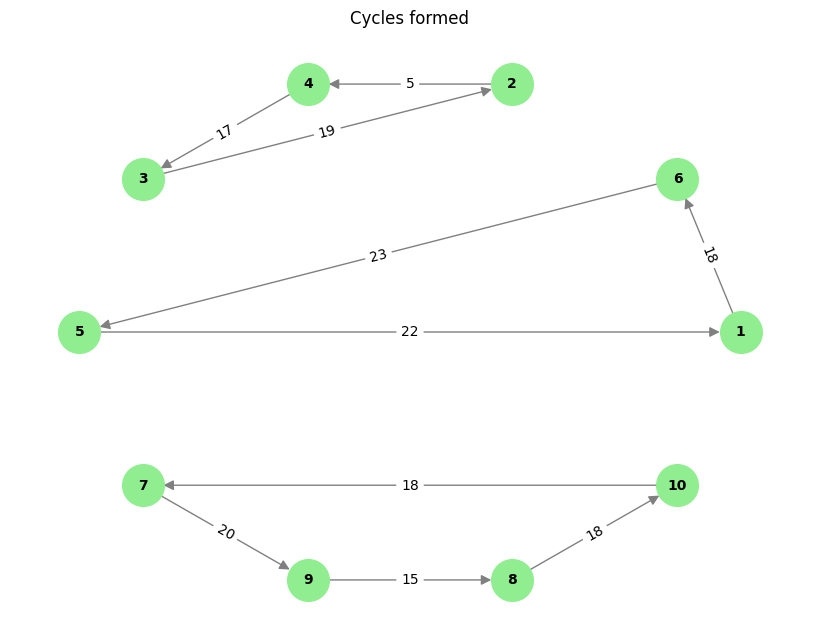

In [ ]:
#Displaying the solution using graph

G = nx.DiGraph()

# Define node names
node_names = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6',6:'7',7:'8',8:'9',9:'10'}

# Add edges to the graph based on the decision variables matrix
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i, j] == 1:
            G.add_edge(node_names[i], node_names[j], weight=weight[i, j])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_size=900, node_color='lightgreen', font_size=10, font_weight='bold', edge_color='gray', arrowsize=15)
edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
plt.title('Cycles formed')
plt.show()

# **4) Extended Edge Formulation**

In [ ]:
model = ConcreteModel()

# since variable are two dimensional ie., x_{ij}, therefore both row and column indicies are defined below
n = 10
row_indices = np.arange(n)
col_indices = np.arange(n)
L= np.arange(n)
k=4       #upper limit of cycle length

# defining varibles
model.x = Var(row_indices, col_indices, L , domain = Binary)   #7(e)

# Set objective function coefficients
weight= np.array([[0,1,11,6,3,18,0,5,1,4],
                  [4,0,9,5,15,9,8,0,9,1 ],
                  [0,19,0,8,5,14,4,8,4,3],
                  [1,13,17,0,0,8,0,1,0,7],
                  [22,3,4,16,0,2,1,6,2,0],
                  [19,3,0,6,23,0,7,3,1,8],
                  [0,4,7,0,2,7,0,7,20,0 ],
                  [8,5,2,3,9,0,6,0,8,18 ],
                  [1,4,8,0,5,3,2,15,0,4 ],
                  [4,0,1,6,9,6,18,4,6,0 ]])

# Define the objective function  7(a)
model.Objective = Objective(expr = sum(sum(weight[i,j]*model.x[i,j,l] for i in row_indices for j in col_indices) for l in L), sense = maximize)

# Define the constraints
model.constraints = ConstraintList()

#Adding constraints
for l in L:
  for i in row_indices:
    model.constraints.add(sum(model.x[j,i,l] for j in col_indices) == sum(model.x[i,j,l] for j in col_indices))   #7(b)

for i in row_indices:
  term=0
  for l in L:
    term+= sum(model.x[i,j,l] for j in col_indices)       #7(c)

  model.constraints.add(term<=1)

for l in L:
  model.constraints.add(sum(model.x[i,j,l] for i in row_indices for j in col_indices)<=k)    #7(d)

# Solve the problem using GLPK solver
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

print(results)


Problem: 
- Name: unknown
  Lower bound: 175.0
  Upper bound: 175.0
  Number of objectives: 1
  Number of constraints: 120
  Number of variables: 1000
  Number of nonzeros: 3800
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.017389774322509766
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#Displaying the solution

print('Maximum objective value (Maximum weight) = ', value(model.Objective))
print('\nDecision Variables matrix:')
print()
print('Solution matrix:')
X_list=[]
for l in L:
  X=np.zeros((10,10))
  for i in row_indices:
    for j in col_indices:
      X[i,j]=model.x[i,j,l].value

  X_list.append(X)
  print('X',l+1,'=',X)
  print()

Maximum objective value (Maximum weight) =  175.0

Decision Variables matrix:

Solution matrix:
X 1 = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

X 2 = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

X 3 = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

Graph number 1 :


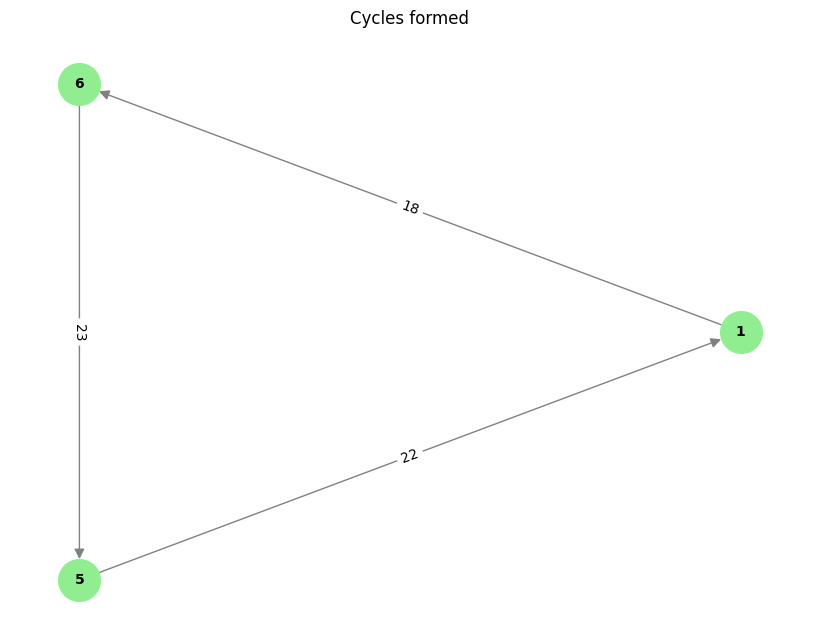

Graph number 2 :


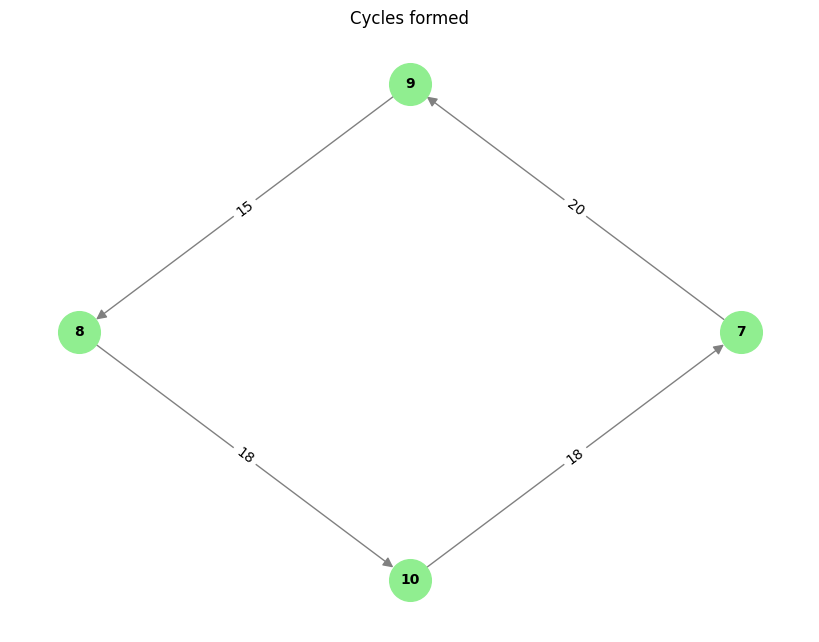

Graph number 3 :


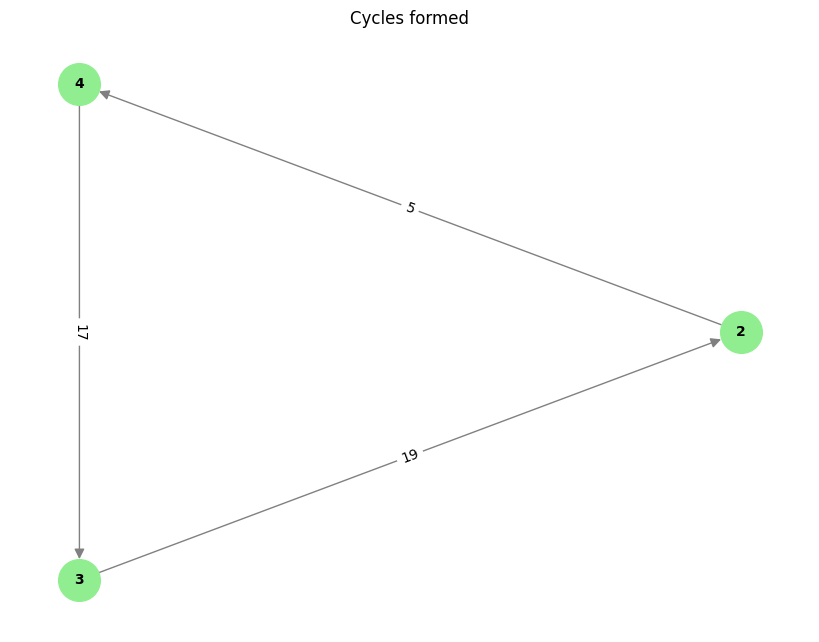

Graph number 4 :


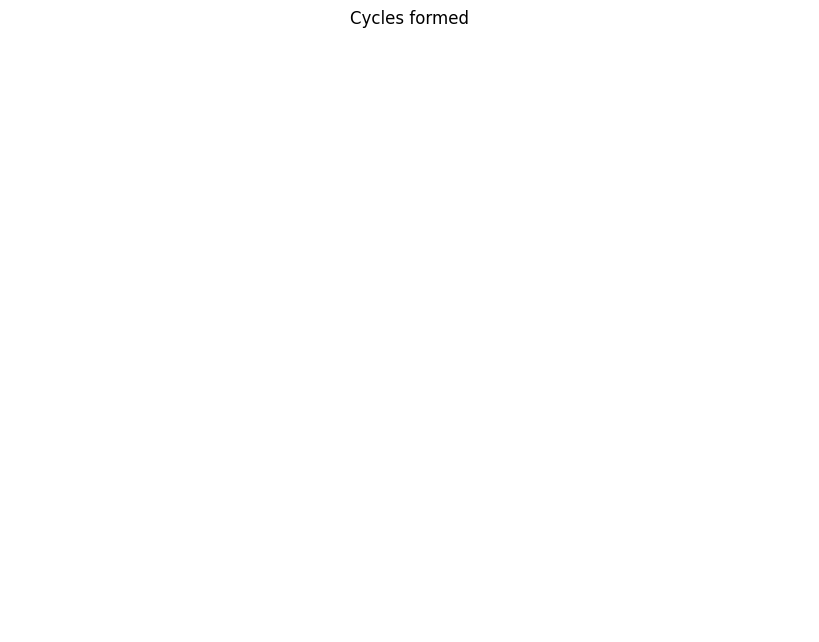

Graph number 5 :


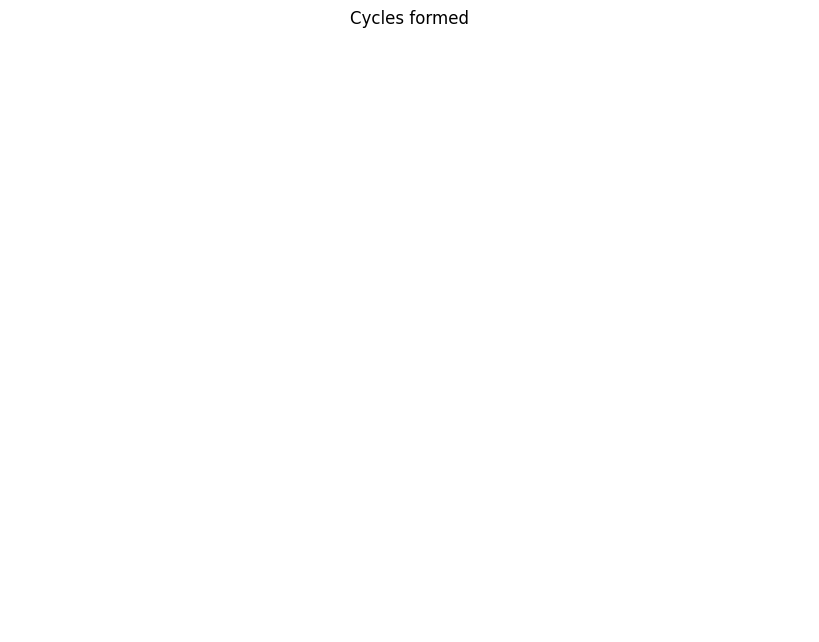

Graph number 6 :


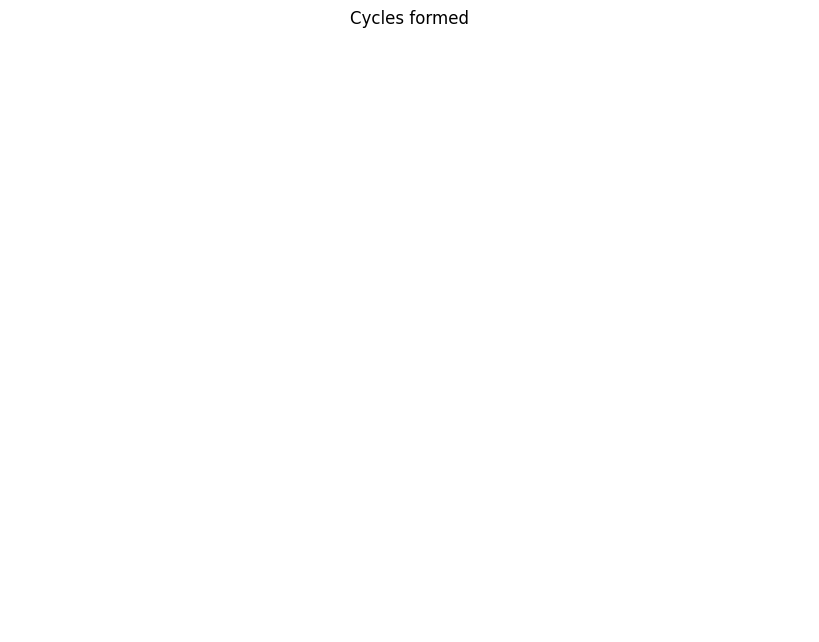

Graph number 7 :


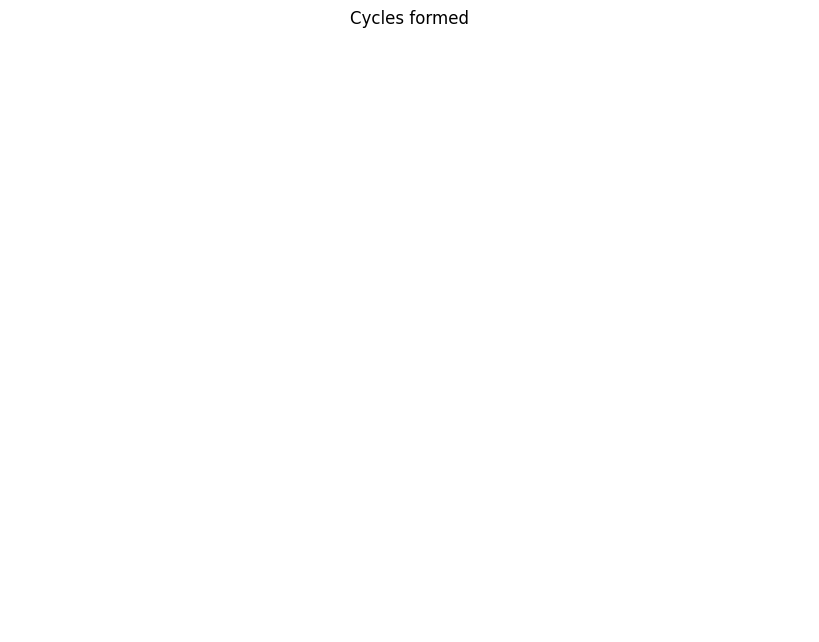

Graph number 8 :


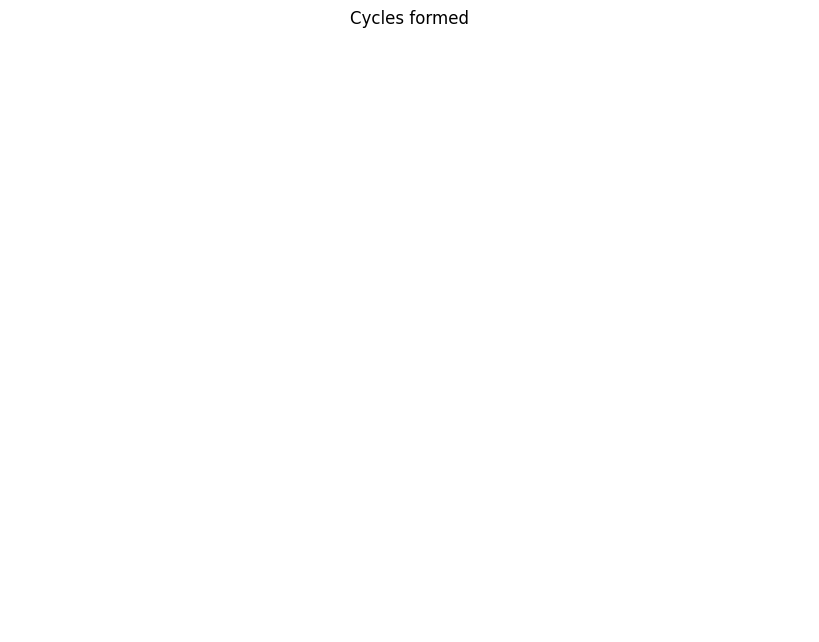

Graph number 9 :


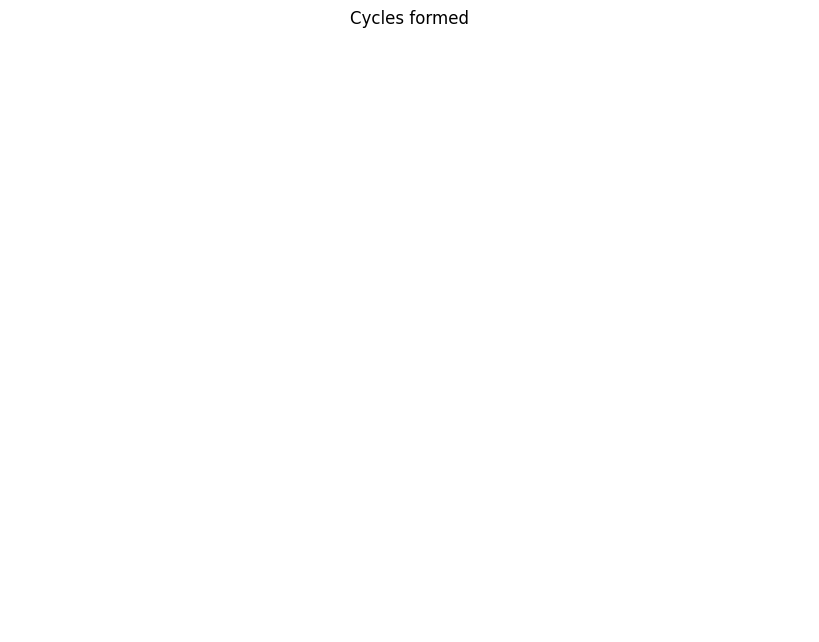

Graph number 10 :


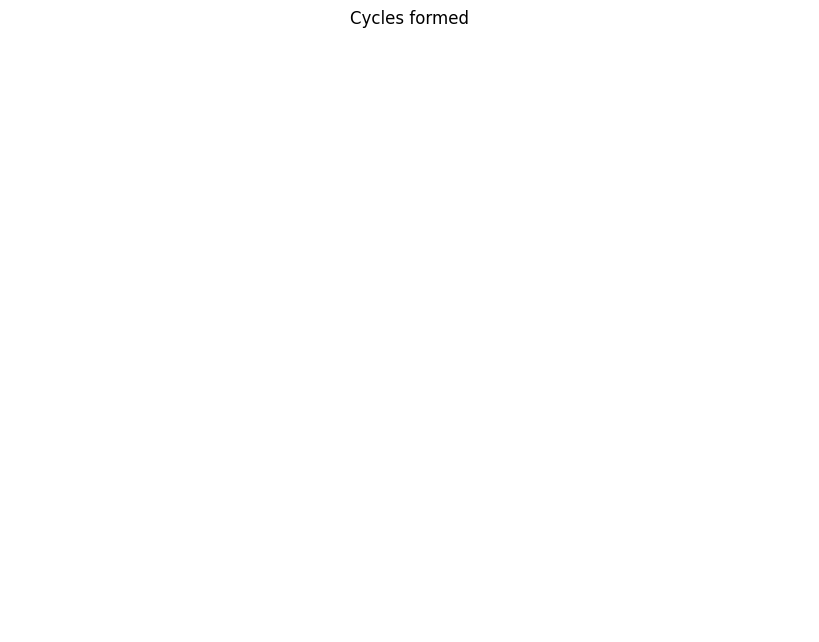

In [ ]:
#Displaying the solution using graph

num=1

for X in X_list:

  G = nx.DiGraph()

  # Define node names
  node_names = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6',6:'7',7:'8',8:'9',9:'10'}

  # Add edges to the graph based on the decision variables matrix
  for i in range(X.shape[0]):
      for j in range(X.shape[1]):
          if X[i, j] == 1:
              G.add_edge(node_names[i], node_names[j], weight=weight[i, j])

  # Plot the graph
  print('Graph number',num,':')
  plt.figure(figsize=(8, 6))
  pos = nx.circular_layout(G)
  nx.draw(G, pos, with_labels=True, arrows=True, node_size=900, node_color='lightgreen', font_size=10, font_weight='bold', edge_color='gray', arrowsize=15)
  edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
  plt.title('Cycles formed')
  plt.show()
  num+=1

# **Reduced Extended Edge formulation**

In [ ]:
model = ConcreteModel()

# since variable are two dimensional ie., x_{ij}, therefore both row and column indicies are defined below
n = 10
row_indices = np.arange(n)
col_indices = np.arange(n)
L= np.arange(n)
k=4       #upper limit of cycle length

# defining varibles
model.x = Var(row_indices, col_indices, L , domain = Binary)   #7(e)

# Set objective function coefficients
weight= np.array([[0,1,11,6,3,18,0,5,1,4],
                  [4,0,9,5,15,9,8,0,9,1 ],
                  [0,19,0,8,5,14,4,8,4,3],
                  [1,13,17,0,0,8,0,1,0,7],
                  [22,3,4,16,0,2,1,6,2,0],
                  [19,3,0,6,23,0,7,3,1,8],
                  [0,4,7,0,2,7,0,7,20,0 ],
                  [8,5,2,3,9,0,6,0,8,18 ],
                  [1,4,8,0,5,3,2,15,0,4 ],
                  [4,0,1,6,9,6,18,4,6,0 ]])

# Define the objective function  7(a)
model.Objective = Objective(expr = sum(sum(weight[i,j]*model.x[i,j,l] for i in row_indices for j in col_indices) for l in L), sense = maximize)

# Define the constraints
model.constraints = ConstraintList()

#Adding constraints
for l in L:
  for i in row_indices:
    for j in col_indices:
      if i<l or j<l:
        model.constraints.add(model.x[i,j,l]==0)

for l in L:
  for i in row_indices:
    model.constraints.add(sum(model.x[j,i,l] for j in col_indices) == sum(model.x[i,j,l] for j in col_indices))   #7(b)

for i in row_indices:
  term=0
  for l in L:
    term+= sum(model.x[i,j,l] for j in col_indices)       #7(c)

  model.constraints.add(term<=1)

for l in L:
  model.constraints.add(sum(model.x[i,j,l] for i in row_indices for j in col_indices)<=k)    #7(d)

for l in L:
  for i in row_indices:
    model.constraints.add(sum(model.x[i,j,l] for j in col_indices) <= sum(model.x[l,j,l] for j in col_indices))

# Solve the problem using GLPK solver
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

print(results)


Problem: 
- Name: unknown
  Lower bound: 175.0
  Upper bound: 175.0
  Number of objectives: 1
  Number of constraints: 835
  Number of variables: 1001
  Number of nonzeros: 6215
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 7
      Number of created subproblems: 7
  Error rc: 0
  Time: 0.02176070213317871
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#Displaying the solution

print('Maximum objective value (Maximum weight) = ', value(model.Objective))
print('\nDecision Variables matrix:')
print()
print('Solution matrix:')
X_list=[]
for l in L:
  X=np.zeros((10,10))
  for i in row_indices:
    for j in col_indices:
      X[i,j]=model.x[i,j,l].value

  X_list.append(X)
  print('X',l+1,'=',X)
  print()

Maximum objective value (Maximum weight) =  175.0

Decision Variables matrix:

Solution matrix:
X 1 = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

X 2 = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

X 3 = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

Graph number 1 :


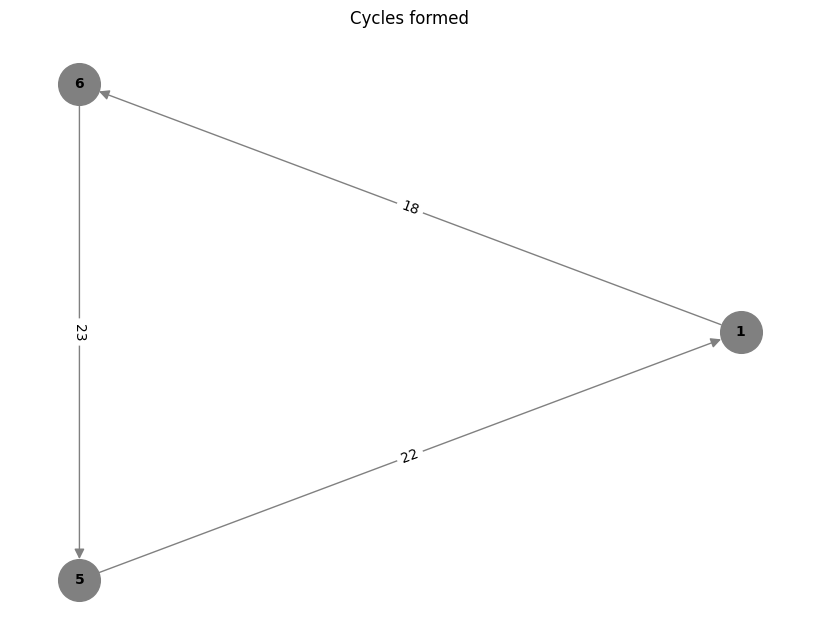

Graph number 2 :


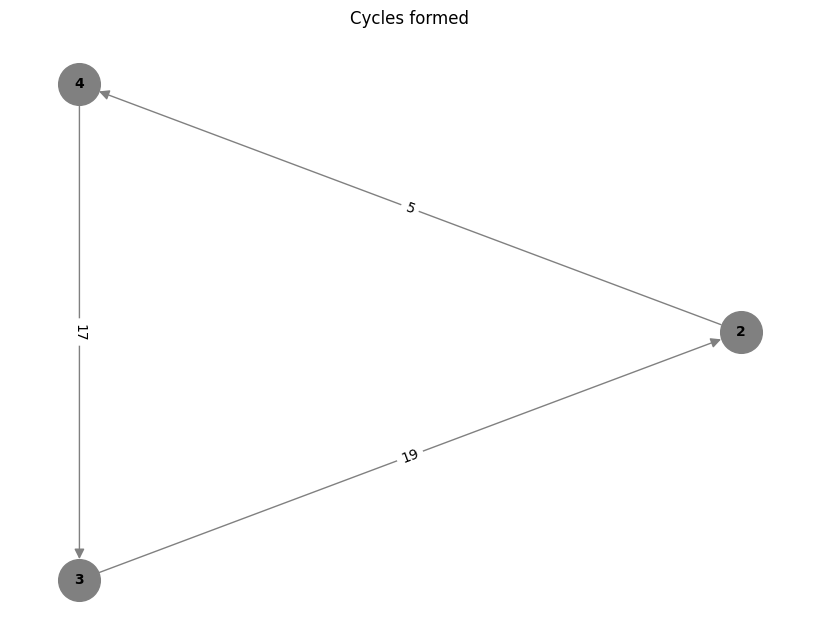

Graph number 3 :


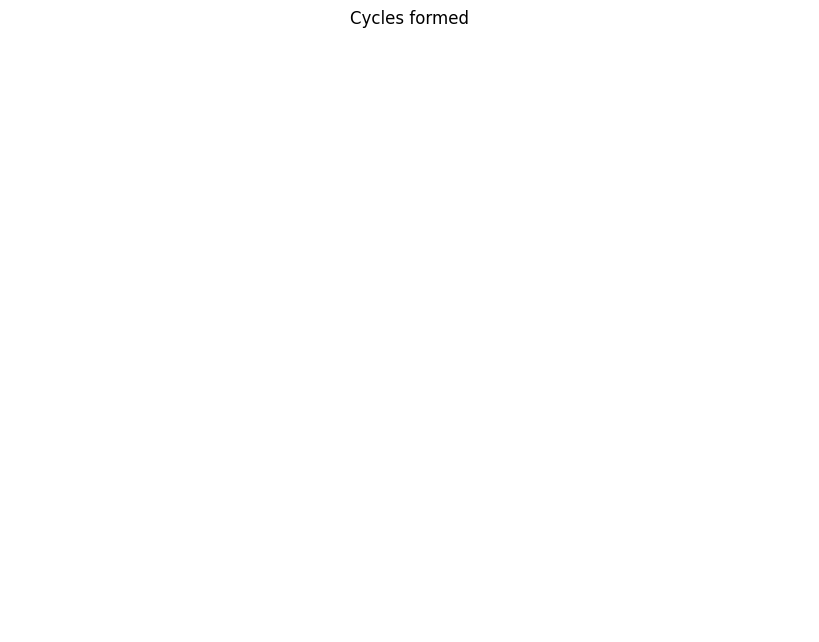

Graph number 4 :


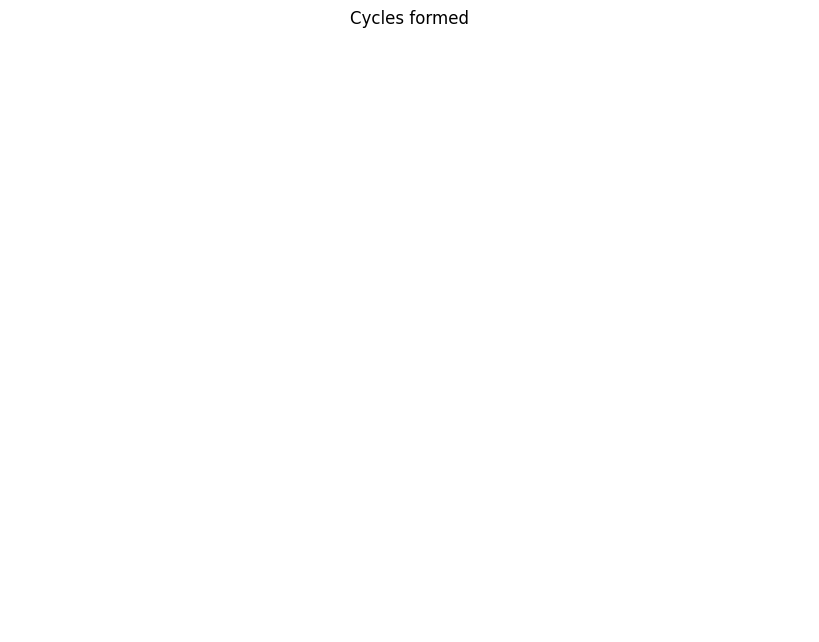

Graph number 5 :


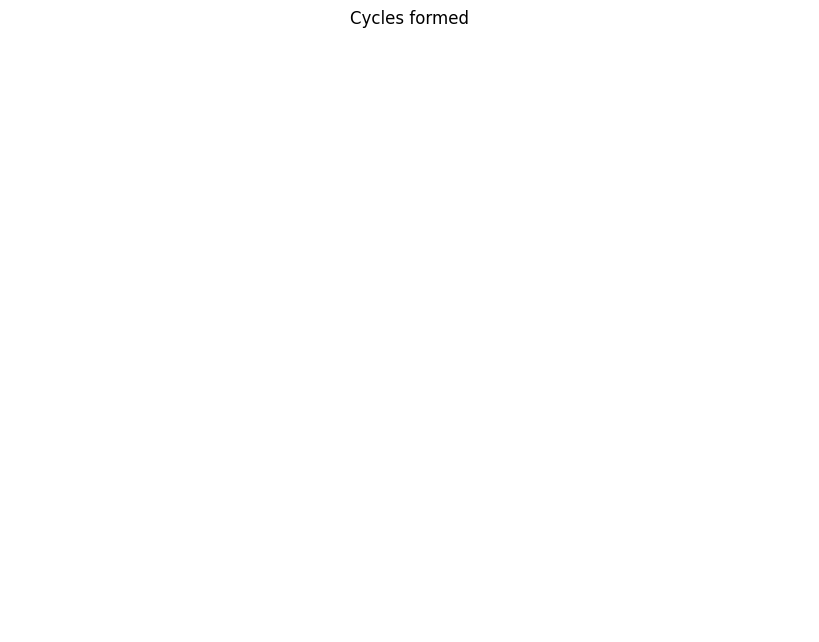

Graph number 6 :


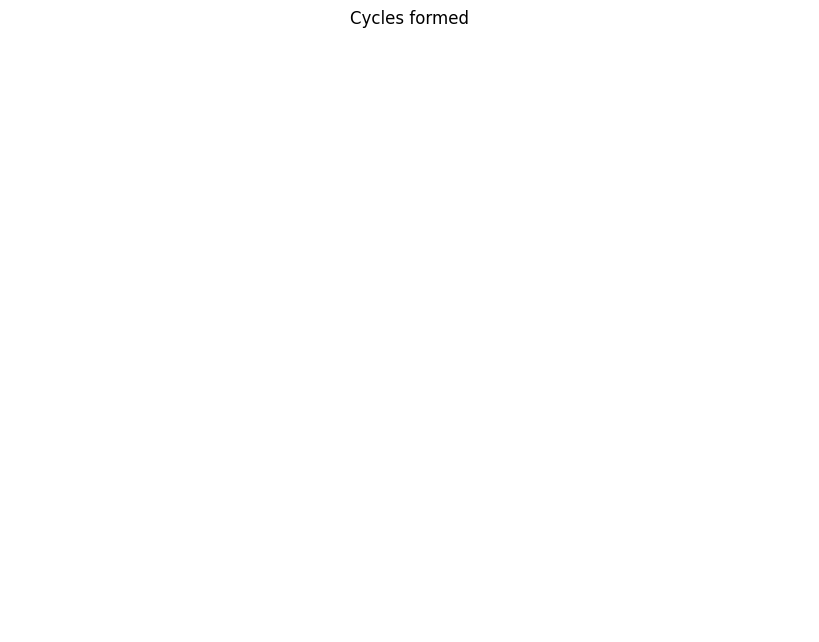

Graph number 7 :


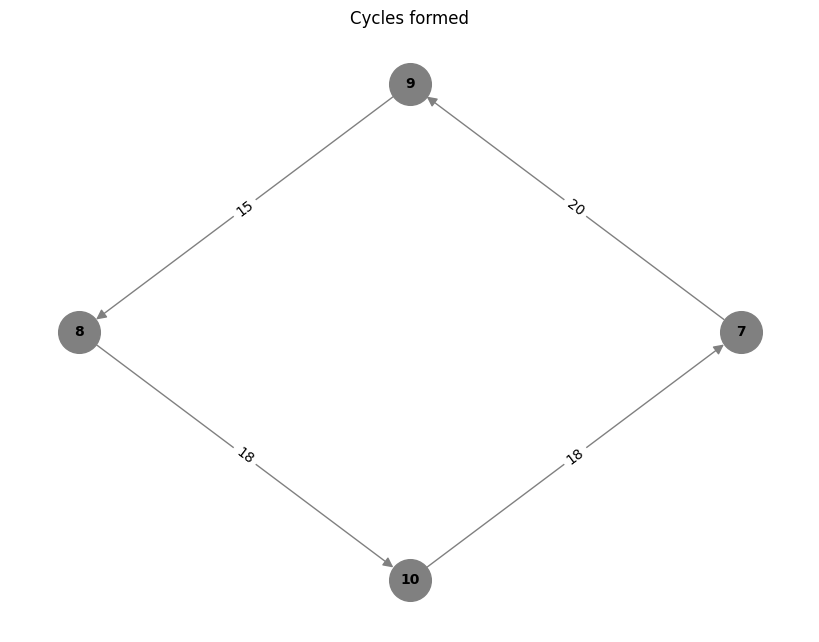

Graph number 8 :


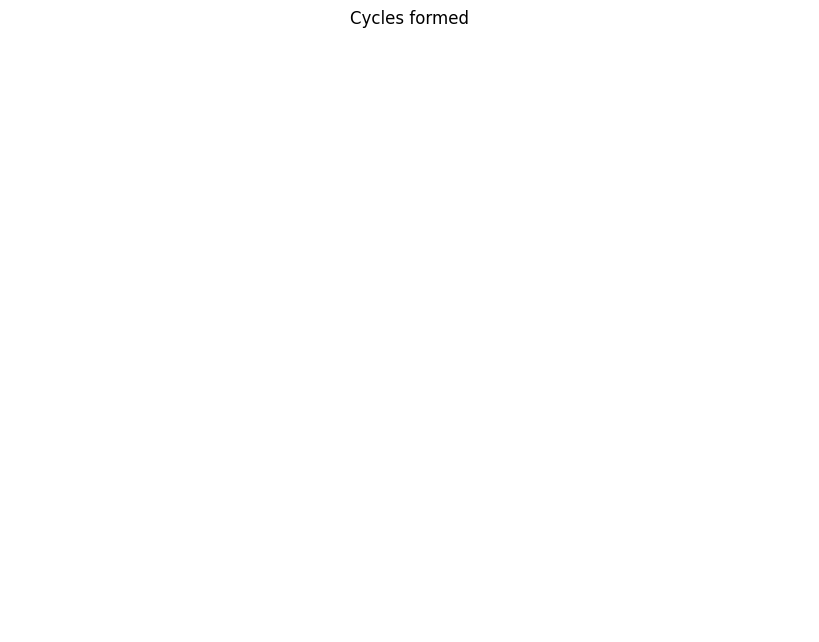

Graph number 9 :


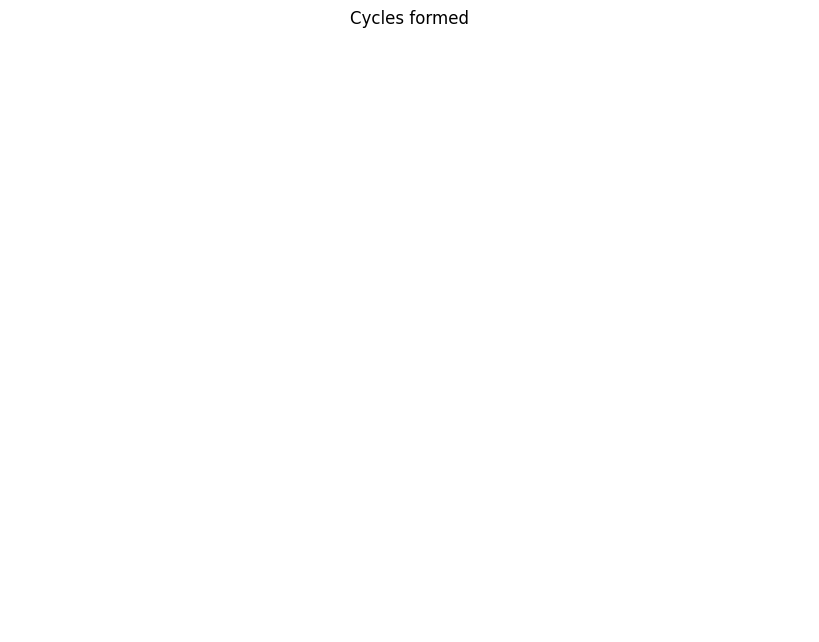

Graph number 10 :


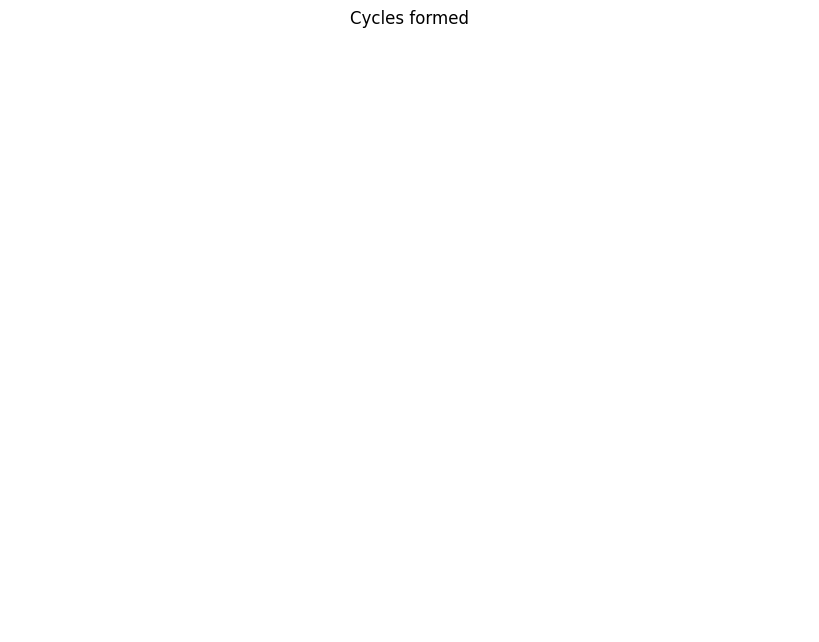

In [ ]:
#Displaying the solution using graph

num=1

for X in X_list:

  G = nx.DiGraph()

  # Define node names
  node_names = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6',6:'7',7:'8',8:'9',9:'10'}

  # Add edges to the graph based on the decision variables matrix
  for i in range(X.shape[0]):
      for j in range(X.shape[1]):
          if X[i, j] == 1:
              G.add_edge(node_names[i], node_names[j], weight=weight[i, j])

  # Plot the graph
  print('Graph number',num,':')
  plt.figure(figsize=(8, 6))
  pos = nx.circular_layout(G)
  nx.draw(G, pos, with_labels=True, arrows=True, node_size=900, node_color='gray', font_size=10, font_weight='bold', edge_color='gray', arrowsize=15)
  edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
  plt.title('Cycles formed')
  plt.show()
  num+=1

# **Comparison Of All The Approaches:**

In [ ]:
df=pd.DataFrame({'Approach':['Edge formulation','Cycle formulation','Reduced Edge Assignment Formulation','Extended Edge Formulation','Reduced Extended Edge Formulation'],'Number of Variables':[100,5760,201,1000,1001],'Number of Constraints':[30260,10,1185,120,835],'Time Taken(seconds)':[0.4687,0.0691,0.04609,0.0285,0.02366]})
df

,Approach,Number of Variables,Number of Constraints,Time Taken(seconds)
0,Edge formulation,100,30260,0.46870
1,Cycle formulation,5760,10,0.06910
2,Reduced Edge Assignment Formulation,201,1185,0.04609
3,Extended Edge Formulation,1000,120,0.02850
4,Reduced Extended Edge Formulation,1001,835,0.02366


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Edge formulation'),
  Text(1, 0, 'Cycle formulation'),
  Text(2, 0, 'Reduced Edge Assignment Formulation'),
  Text(3, 0, 'Extended Edge Formulation'),
  Text(4, 0, 'Reduced Extended Edge Formulation')])

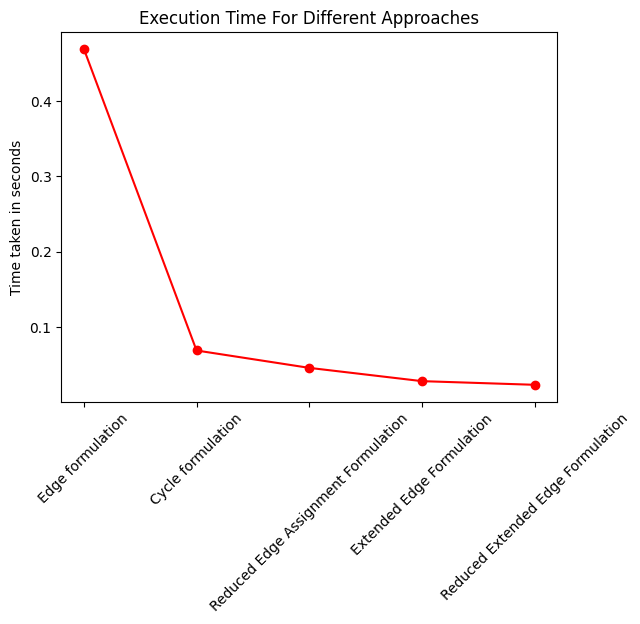

In [ ]:
plt.plot(['Edge formulation','Cycle formulation','Reduced Edge Assignment Formulation','Extended Edge Formulation','Reduced Extended Edge Formulation'],[0.4687,0.0691,0.04609,0.0285,0.02366], marker='o',color='r')
plt.ylabel('Time taken in seconds')
plt.title('Execution Time For Different Approaches')
plt.xticks(rotation=45)